In [1]:
from astropy.table import Table, join, Column
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = "svg"

# My modules
from my_progs.catalog.read_icrfn import read_icrf3

Read the ICRF3 X/Ka catalog.

In [2]:
# Read ICRF3 X/Ka catalog
icrf3_xka = read_icrf3(wv="xka")

Have a glance of the catalog.

In [3]:
icrf3_xka

icrf_name,iers_name,type,ra,dec,ra_err,dec_err,ra_dec_corr,mean_obs,pos_err,beg_obs,end_obs,nb_sess,nb_del
,,,deg,deg,mas,mas,,,,,,,
str16,str8,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
J000435.6-473619,0002-478,D,1.1485644423333332,-47.60544576569445,0.13552067157926384,0.15839999999999999,-0.4333,57086.5,0.17781648296586014,56297.6,58027.3,23,30
J000504.3+542824,0002+541,--,1.268180768958333,54.47359004538889,0.09003805980033948,0.1306,0.1878,57364.8,0.13255795927164774,55304.5,58146.7,27,54
J000557.1+382015,0003+380,--,1.488230883375,38.33754131888889,0.05988665795370894,0.08139999999999999,-0.3088,56844.3,0.08511922253959626,53561.7,58146.9,88,126
J000613.8-062335,0003-066,--,1.5578869827083333,-6.393148639388889,0.09346512575149064,0.12929999999999997,-0.5731,56545.8,0.14394735046495033,53561.6,58146.8,92,137
J000903.9+062821,0006+061,--,2.266382655708333,6.47256664575,0.09225816887728226,0.119,-0.6048,56785.3,0.13620602079885977,53651.5,58146.8,77,110
J001031.0+105829,0007+106,D,2.629191267708333,10.974862303833333,0.05522123270593726,0.08829999999999999,-0.4731,56132.3,0.09345139236115027,53694.3,58146.9,113,179
J001101.2-261233,0008-264,--,2.755194709333333,-26.209271528888888,0.12192770161551496,0.1281,-0.7062,56815.1,0.16338616394166613,53561.7,58111.2,66,114
J001135.2+082355,0009+081,--,2.8969566850833326,8.398773887555555,0.07597635524116485,0.10949999999999999,-0.5487,56940.2,0.12001796488424711,53694.3,58146.9,67,95


Seperate the sources into the "defining sources" and "other sources", and also "south" and "north".

In [4]:
# Defining sources
mask_def = (icrf3_xka["type"] == "D")
icrf3_xka_def = icrf3_xka[mask_def]

# Other sources
mask_oth = (icrf3_xka["type"] != "D")
icrf3_xka_oth = icrf3_xka[mask_oth]

# Southern sources
mask_sou = (icrf3_xka["dec"] < 0)
icrf3_xka_sou = icrf3_xka[mask_sou]

# Northern sources
mask_nor = (icrf3_xka["dec"] >= 0)
icrf3_xka_nor = icrf3_xka[mask_nor]

In [5]:
print("There are {} defining sources and {} other sources, "
      "{} sources in the northern hemisphere and {} in the south.".format(
      len(icrf3_xka_def), len(icrf3_xka_oth), len(icrf3_xka_nor), len(icrf3_xka_sou)))

There are 176 defining sources and 502 other sources, 317 sources in the northern hemisphere and 361 in the south.


Then I plotted the sky distribution of all these sources.

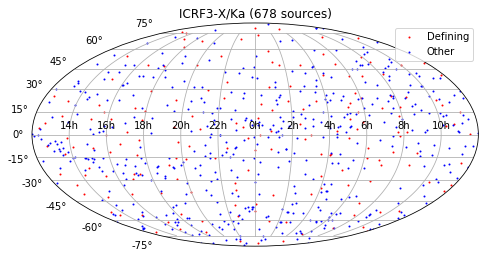

In [6]:
ra_def = coord.Angle(icrf3_xka_def["ra"]).wrap_at(180*u.degree)
dec_def = coord.Angle(icrf3_xka_def["dec"])

ra_oth = coord.Angle(icrf3_xka_oth["ra"]).wrap_at(180*u.degree)
dec_oth = coord.Angle(icrf3_xka_oth["dec"])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra_def.radian, dec_def.radian, c="r", s=1, label="Defining")
ax.scatter(ra_oth.radian, dec_oth.radian, c="b", s=1, label="Other")
ax.set_xticklabels(["14h","16h","18h","20h","22h","0h","2h","4h","6h","8h","10h"])
ax.set_title("ICRF3-X/Ka (678 sources)")
ax.grid(True)
ax.legend()

plt.savefig("../plots/icrf3_xka_source_distribution.eps")

Also the sky ditribution of the formal in right ascension, declination, and the correlation.

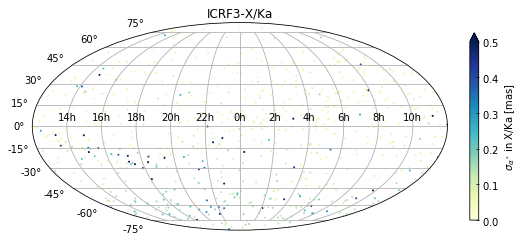

In [7]:
# The distribution of formal errors in right ascension.
ra_all = coord.Angle(icrf3_xka["ra"]).wrap_at(180*u.degree)
dec_all = coord.Angle(icrf3_xka["dec"])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
sc = ax.scatter(ra_all.radian, dec_all.radian, c=icrf3_xka["ra_err"], 
                s=1, vmin=0, vmax=0.5, cmap="YlGnBu")
ax.set_xticklabels(["14h","16h","18h","20h","22h","0h","2h","4h","6h","8h","10h"])
plt.colorbar(sc, extend="max",
             label="$\sigma_{\\alpha^*}$ in X/Ka [mas]", fraction=0.02)
ax.grid(True)
ax.set_title("ICRF3-X/Ka")

plt.savefig("../plots/icrf3_xka_ra_error.eps")

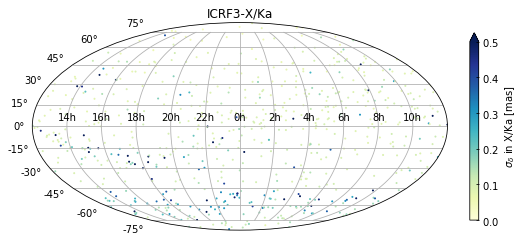

In [8]:
# The distribution of formal errors in declination.
ra_all = coord.Angle(icrf3_xka["ra"]).wrap_at(180*u.degree)
dec_all = coord.Angle(icrf3_xka["dec"])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="mollweide")
sc = ax.scatter(ra_all.radian, dec_all.radian, c=icrf3_xka["dec_err"],
                s=1, vmin=0, vmax=0.5, cmap="YlGnBu")
ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h",
                    "0h", "2h", "4h", "6h", "8h", "10h"])
plt.colorbar(sc, extend="max",
             label="$\sigma_{\delta}$ in X/Ka [mas]", fraction=0.02)
ax.grid(True)
ax.set_title("ICRF3-X/Ka")

plt.savefig("../plots/icrf3_xka_dec_error.eps")

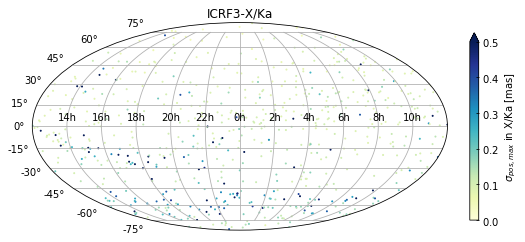

In [9]:
# The distribution of formal errors in declination.
ra_all = coord.Angle(icrf3_xka["ra"]).wrap_at(180*u.degree)
dec_all = coord.Angle(icrf3_xka["dec"])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="mollweide")
sc = ax.scatter(ra_all.radian, dec_all.radian, c=icrf3_xka["pos_err"],
                s=1, vmin=0, vmax=0.5, cmap="YlGnBu")
ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h",
                    "0h", "2h", "4h", "6h", "8h", "10h"])
plt.colorbar(sc, extend="max",
             label="$\sigma_{pos,max}$ in X/Ka [mas]", fraction=0.02)
ax.grid(True)
ax.set_title("ICRF3-X/Ka")

plt.savefig("../plots/icrf3_xka_pos_error.eps")

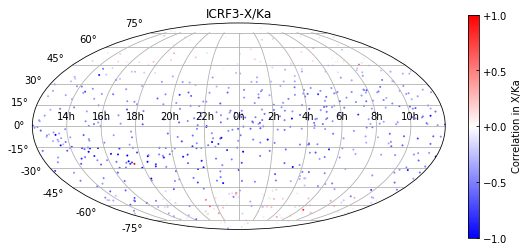

In [10]:
# The distribution of correlation between R.A. and Decl..
ra_all = coord.Angle(icrf3_xka["ra"]).wrap_at(180*u.degree)
dec_all = coord.Angle(icrf3_xka["dec"])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="mollweide")
sc = ax.scatter(ra_all.radian, dec_all.radian, c=icrf3_xka["ra_dec_corr"],
                s=1, vmin=-1, vmax=1, cmap="bwr")
ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h",
                    "0h", "2h", "4h", "6h", "8h", "10h"])
plt.colorbar(sc, ticks=np.arange(-1., 1.1, 0.5), format="$%+.1f$",
             label="Correlation in X/Ka", fraction=0.025)
ax.grid(True)
ax.set_title("ICRF3-X/Ka")

plt.savefig("../plots/icrf3_xka_ra_dec_corr.eps")

Then I check the formal errors of the source positions.

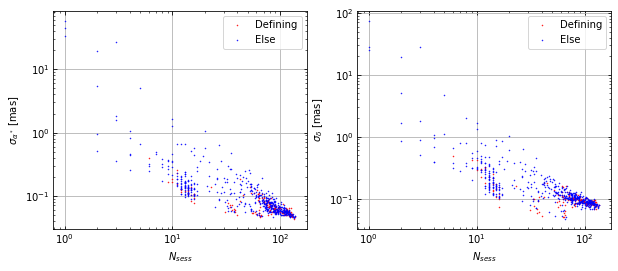

In [11]:
# Formal errors vs. number of observing sessions.
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

ax0.plot(icrf3_xka_def["nb_sess"],
         icrf3_xka_def["ra_err"], "r.", ms=1, label="Defining")
ax0.plot(icrf3_xka_oth["nb_sess"],
         icrf3_xka_oth["ra_err"], "b.", ms=1, label="Else")
ax0.set_xscale("log")
ax0.set_yscale("log")
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax0.set_ylabel("$\sigma_{\\alpha^*}$ [mas]")
ax0.set_xlabel("$N_{sess}$")
ax0.grid()
ax0.legend()

ax1.plot(icrf3_xka_def["nb_sess"],
         icrf3_xka_def["dec_err"], "r.", ms=1, label="Defining")
ax1.plot(icrf3_xka_oth["nb_sess"],
         icrf3_xka_oth["dec_err"], "b.", ms=1, label="Else")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax1.set_ylabel("$\sigma_{\\delta}$ [mas]")
ax1.set_xlabel("$N_{sess}$")
ax1.grid()
ax1.legend()

plt.savefig("../plots/icrf3_xka_error_numsess.eps")

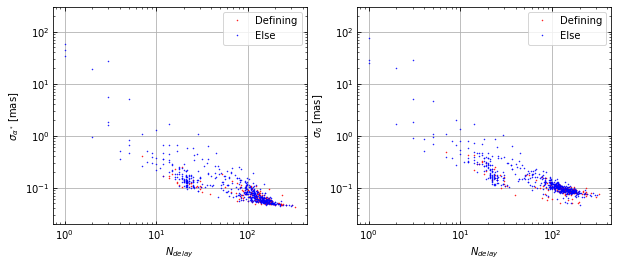

In [12]:
# Formal errors vs. number of observing delays.
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

ax0.plot(icrf3_xka_def["nb_del"],
         icrf3_xka_def["ra_err"], "r.", ms=1, label="Defining")
ax0.plot(icrf3_xka_oth["nb_del"],
         icrf3_xka_oth["ra_err"], "b.", ms=1, label="Else")
ax0.set_xscale("log")
ax0.set_yscale("log")
ax0.set_ylim([0.02, 300])
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax0.set_ylabel("$\sigma_{\\alpha^*}$ [mas]")
ax0.set_xlabel("$N_{delay}$")
ax0.grid()
ax0.legend()

ax1.plot(icrf3_xka_def["nb_del"],
         icrf3_xka_def["dec_err"], "r.", ms=1, label="Defining")
ax1.plot(icrf3_xka_oth["nb_del"],
         icrf3_xka_oth["dec_err"], "b.", ms=1, label="Else")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim([0.02, 300])
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax1.set_ylabel("$\sigma_{\\delta}$ [mas]")
ax1.set_xlabel("$N_{delay}$")
ax1.grid()
ax1.legend()

plt.savefig("../plots/icrf3_xka_error_numdelay.eps")

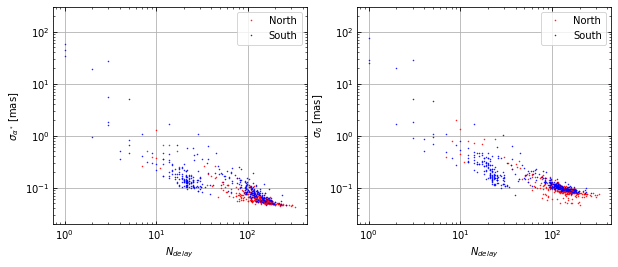

In [13]:
# Formal errors vs. number of observing delays.
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

ax0.plot(icrf3_xka_nor["nb_del"],
         icrf3_xka_nor["ra_err"], "r.", ms=1, label="North")
ax0.plot(icrf3_xka_sou["nb_del"],
         icrf3_xka_sou["ra_err"], "b.", ms=1, label="South")
ax0.set_xscale("log")
ax0.set_yscale("log")
ax0.set_ylim([0.02, 300])
ax0.xaxis.set_ticks_position("both")
ax0.yaxis.set_ticks_position("both")
ax0.set_ylabel("$\sigma_{\\alpha^*}$ [mas]")
ax0.set_xlabel("$N_{delay}$")
ax0.grid()
ax0.legend()

ax1.plot(icrf3_xka_nor["nb_del"],
         icrf3_xka_nor["dec_err"], "r.", ms=1, label="North")
ax1.plot(icrf3_xka_sou["nb_del"],
         icrf3_xka_sou["dec_err"], "b.", ms=1, label="South")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim([0.02, 300])
ax1.xaxis.set_ticks_position("both")
ax1.yaxis.set_ticks_position("both")
ax1.set_ylabel("$\sigma_{\\delta}$ [mas]")
ax1.set_xlabel("$N_{delay}$")
ax1.grid()
ax1.legend()

plt.savefig("../plots/icrf3_xka_error_numdelay-south-north.eps")

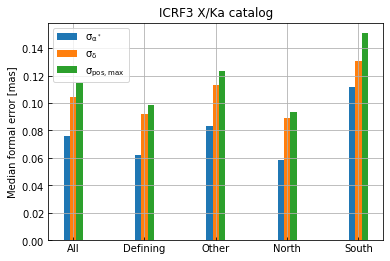

In [14]:
# Plot the median formal error

# Median formal error
# Median formal error
med_ra = [np.median(icrf3_xka["ra_err"].filled()),
          np.median(icrf3_xka_def["ra_err"].filled()),
          np.median(icrf3_xka_oth["ra_err"].filled()),
          np.median(icrf3_xka_nor["ra_err"].filled()),
          np.median(icrf3_xka_sou["ra_err"].filled())]

med_dec = [np.median(icrf3_xka["dec_err"].filled()),
           np.median(icrf3_xka_def["dec_err"].filled()),
           np.median(icrf3_xka_oth["dec_err"].filled()),
           np.median(icrf3_xka_nor["dec_err"].filled()),
           np.median(icrf3_xka_sou["dec_err"].filled())]

med_pos = [np.median(icrf3_xka["pos_err"].filled()),
           np.median(icrf3_xka_def["pos_err"].filled()),
           np.median(icrf3_xka_oth["pos_err"].filled()),
           np.median(icrf3_xka_nor["pos_err"].filled()),
           np.median(icrf3_xka_sou["pos_err"].filled())]

names = ["All", "Defining", "Other", "North", "South"]

pos = np.arange(len(names)) + 1
width = 0.8 / (2 * len(names) - 1)

fig, ax = plt.subplots()
ax.bar(pos - width, med_ra, width=width, label="$\mathrm{\sigma_{\\alpha^*}}$")
ax.bar(pos, med_dec, width=width, label="$\mathrm{\sigma_{\\delta}}$")
ax.bar(pos + width, med_pos, width=width, label="$\mathrm{\sigma_{pos,max}}$")

ax.set_xticks(pos)
ax.set_xticklabels(names)

ax.set_ylabel("Median formal error [mas]")

ax.set_title("ICRF3 X/Ka catalog")

ax.legend()
ax.grid()

plt.savefig("../plots/icrf3_xka_median_error.eps")

In [15]:
# Median formal error
print("Median formal error in ICRF3 X/Ka catalog [mas]:  \n"
      "-----------------------------------------------\n"
      "           R.A. cos(decl.)    Decl.     EEMA   \n"
      "All        %6.3f             %6.3f    %6.3f    \n"
      "Defining   %6.3f             %6.3f    %6.3f    \n"
      "Other      %6.3f             %6.3f    %6.3f    \n" 
      "North      %6.3f             %6.3f    %6.3f    \n"
      "South      %6.3f             %6.3f    %6.3f    \n"% 
    (med_ra[0], med_dec[0], med_pos[0],
     med_ra[1], med_dec[1], med_pos[1],
     med_ra[2], med_dec[2], med_pos[2],
     med_ra[3], med_dec[3], med_pos[3],
     med_ra[4], med_dec[4], med_pos[4]
    ))

Median formal error in ICRF3 X/Ka catalog [mas]:  
-----------------------------------------------
           R.A. cos(decl.)    Decl.     EEMA   
All         0.076              0.104     0.115    
Defining    0.062              0.092     0.098    
Other       0.084              0.113     0.124    
North       0.059              0.089     0.093    
South       0.112              0.131     0.151    



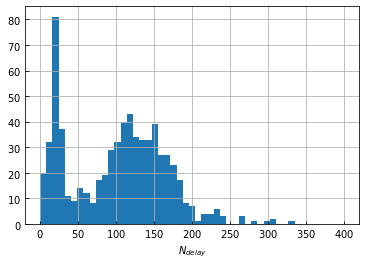

In [19]:
bins = np.linspace(0, 400, 50)

fig, ax = plt.subplots()

ax.hist(icrf3_xka["nb_del"], bins)
ax.set_xlabel("$N_{delay}$")
ax.grid()

plt.savefig("../plots/icrf3_xka_nobs_hist.eps")